EXPLORATORY DATA ANALYSIS ON A DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Cardiotocographic.csv')
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [4]:
df.shape

(2126, 14)

In [5]:
df.ndim

2

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
## Data Cleaning and Preparation
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [8]:
for i in df.columns:
    df[i].fillna(df[i].mean() , inplace = True)

In [9]:
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [10]:
## duplicates
df.duplicated().sum()

np.int64(2)

In [11]:
df[df.duplicated()]

LB        AC   FM        UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
1115  122.0  0.000000  0.0  0.000000  0.0  0.0  0.0  19.0   1.9   0.0  15.1   
1458  148.0  0.004717  0.0  0.002358  0.0  0.0  0.0  40.0   0.9   0.0  10.6   

      Width  Tendency  NSP  
1115   39.0       0.0  1.0  
1458   35.0       0.0  1.0

In [12]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [13]:
df.duplicated().sum()

np.int64(0)

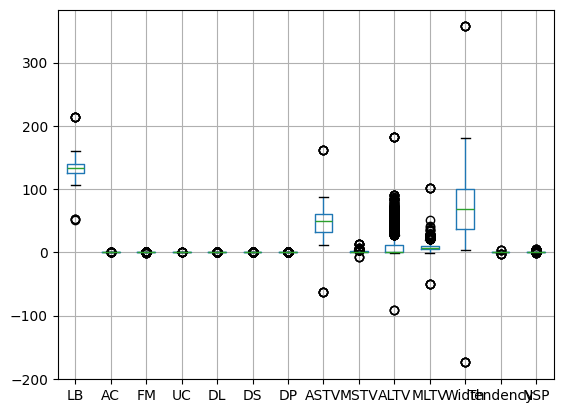

In [14]:
## outlier_detection
df.boxplot()
plt.show()

In [15]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Extreme=Q1-1.5*IQR
    Upper_Extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:Lower_Extreme if x<Lower_Extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

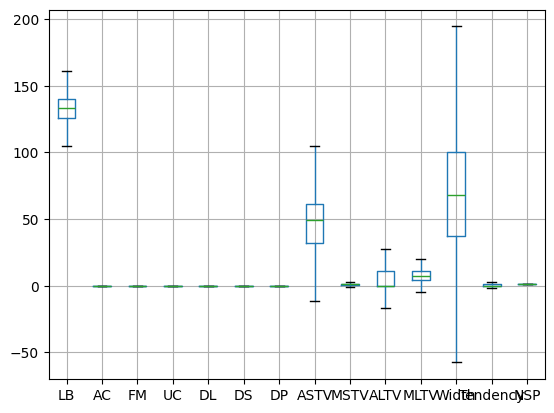

In [16]:
df.boxplot()
plt.show()

Statistical Summary

In [17]:
df.describe()

LB           AC           FM           UC           DL  \
count  2124.000000  2124.000000  2124.000000  2124.000000  2124.000000   
mean    133.292118     0.003148     0.001570     0.004365     0.001772   
std       9.926749     0.003827     0.002487     0.003001     0.002670   
min     105.000000    -0.008418    -0.003853    -0.005158    -0.004938   
25%     126.000000     0.000000     0.000000     0.001858     0.000000   
50%     133.000000     0.001668     0.000000     0.004486     0.000000   
75%     140.000000     0.005612     0.002568     0.006536     0.003292   
max     161.000000     0.014030     0.006421     0.013552     0.008230   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2124.0  2124.0  2124.000000  2124.000000  2124.000000  2124.000000   
mean      0.0     0.0    46.998334     1.304554     6.697979     8.011660   
std       0.0     0.0    17.609911     0.781303    10.381254     5.046506   
min       0.0     0.0   -11.500000    -0.800000   -16.500000    -4.700000   
25%       0.0     0.0    32.000000     0.700000     0.000000     4.600000   
50%       0.0     0.0    49.000000     1.200000     0.000000     7.500000   
75%       0.0     0.0    61.000000     1.700000    11.000000    10.800000   
max       0.0     0.0   104.500000     3.200000    27.500000    20.100000   

             Width     Tendency     NSP  
count  2124.000000  2124.000000  2124.0  
mean     70.352452     0.319963     1.0  
std      39.575996     0.621818     0.0  
min     -57.500000    -1.500000     1.0  
25%      37.000000     0.000000     1.0  
50%      68.000000     0.000000     1.0  
75%     100.000000     1.000000     1.0  
max     194.500000     2.500000     1.0

In [18]:
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2119  140.000000  0.000000  0.006421  0.007426  0.000000  0.0  0.0  79.0   
2120  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2121  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2123  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV  ALTV  MLTV  Width  Tendency  NSP  
0      0.5  27.5   2.4   64.0  0.999926  1.0  
1      2.1   0.0  10.4  130.0  0.000000  1.0  
2      2.1   0.0  13.4  130.0  0.000000  1.0  
3      2.4   0.0  20.1  117.0  1.000000  1.0  
4      2.4   0.0  19.9  117.0  1.000000  1.0  
...    ...   ...   ...    ...       ...  ...  
2119   0.2  25.0   7.2   40.0  0.000000  1.0  
2120   0.4  22.0   7.1   66.0  1.000000  1.0  
2121   0.4  20.0   6.1   67.0  1.000000  1.0  
2122   0.4  27.0   7.0   66.0  1.000000  1.0  
2123   0.4  27.5   5.0   42.0  0.000000  1.0  

[2124 rows x 14 columns]

In [19]:
df.mean()

LB          133.292118
AC            0.003148
FM            0.001570
UC            0.004365
DL            0.001772
DS            0.000000
DP            0.000000
ASTV         46.998334
MSTV          1.304554
ALTV          6.697979
MLTV          8.011660
Width        70.352452
Tendency      0.319963
NSP           1.000000
dtype: float64

In [20]:
df.median()

LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004486
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [21]:
df.mode()

LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  Width  \
0  133.0  0.0  0.0  0.0  0.0  0.0  0.0  65.0   0.5   0.0   0.0   39.0   
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   0.8   NaN   NaN    NaN   

   Tendency  NSP  
0       0.0  1.0  
1       NaN  NaN

In [22]:
df.std()

LB           9.926749
AC           0.003827
FM           0.002487
UC           0.003001
DL           0.002670
DS           0.000000
DP           0.000000
ASTV        17.609911
MSTV         0.781303
ALTV        10.381254
MLTV         5.046506
Width       39.575996
Tendency     0.621818
NSP          0.000000
dtype: float64

In [23]:
df.min()

LB          105.000000
AC           -0.008418
FM           -0.003853
UC           -0.005158
DL           -0.004938
DS            0.000000
DP            0.000000
ASTV        -11.500000
MSTV         -0.800000
ALTV        -16.500000
MLTV         -4.700000
Width       -57.500000
Tendency     -1.500000
NSP           1.000000
dtype: float64

In [24]:
df.max()

LB          161.000000
AC            0.014030
FM            0.006421
UC            0.013552
DL            0.008230
DS            0.000000
DP            0.000000
ASTV        104.500000
MSTV          3.200000
ALTV         27.500000
MLTV         20.100000
Width       194.500000
Tendency      2.500000
NSP           1.000000
dtype: float64

Key Insights

In LB : The range is from 106 to 160 and the total no of values are 896. The mean for the column is 131.85 , median is 133 so, there is no much difference in thatForm the columns AC, FM,UC and DL I conclude that, there is so much difference in the mean and median.
DS, DP and NSP columns which contains minimun and maximum values are same. By that I conclude that there is only one type of values are present. In DS and DP which contains 0 as single type value and in NSP 1 as single type variable
In column ASTV, mean and median are 42.46 and 41 with standard deviation 15.05. By this for every standard deviation there is step in 15.05 and here also no much defference in the mean and median.
In ALTV column, The quantile 1 and quantile 2 have same values it indicates that more datapoints below the median and this column contains more difference in the median and mean than before columns which I observed

Data Visualization

In [25]:
num_cols=df.select_dtypes(include=["int","float"])
print("num_cols:")
print(num_cols.columns)
num_cols

num_cols:
Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')


LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2119  140.000000  0.000000  0.006421  0.007426  0.000000  0.0  0.0  79.0   
2120  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2121  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2123  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV  ALTV  MLTV  Width  Tendency  NSP  
0      0.5  27.5   2.4   64.0  0.999926  1.0  
1      2.1   0.0  10.4  130.0  0.000000  1.0  
2      2.1   0.0  13.4  130.0  0.000000  1.0  
3      2.4   0.0  20.1  117.0  1.000000  1.0  
4      2.4   0.0  19.9  117.0  1.000000  1.0  
...    ...   ...   ...    ...       ...  ...  
2119   0.2  25.0   7.2   40.0  0.000000  1.0  
2120   0.4  22.0   7.1   66.0  1.000000  1.0  
2121   0.4  20.0   6.1   67.0  1.000000  1.0  
2122   0.4  27.0   7.0   66.0  1.000000  1.0  
2123   0.4  27.5   5.0   42.0  0.000000  1.0  

[2124 rows x 14 columns]

In [45]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index([], dtype='object')

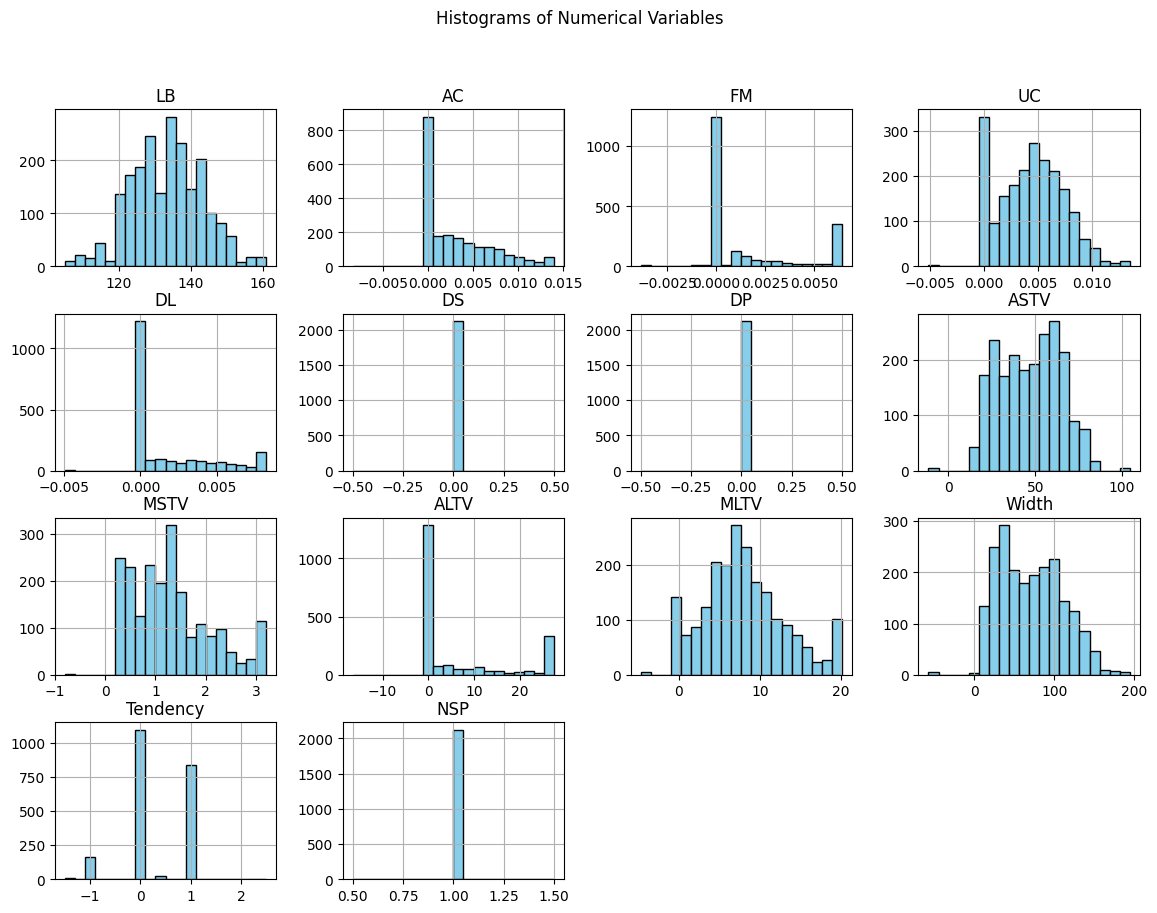

In [53]:
df[['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']].hist(bins=20, figsize=(14, 10), color='skyblue',edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.show()

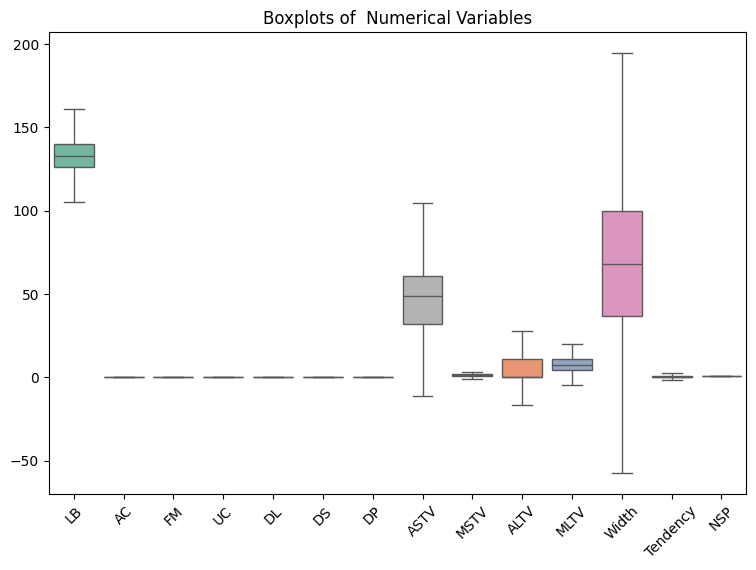

In [55]:
# Boxplots to observe distributions and outliers
plt.figure(figsize=(9, 6))
sns.boxplot(data=df[['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV','MLTV', 'Width', 'Tendency', 'NSP']], palette='Set2')
plt.title('Boxplots of  Numerical Variables')
plt.xticks(rotation=45)
plt.show()

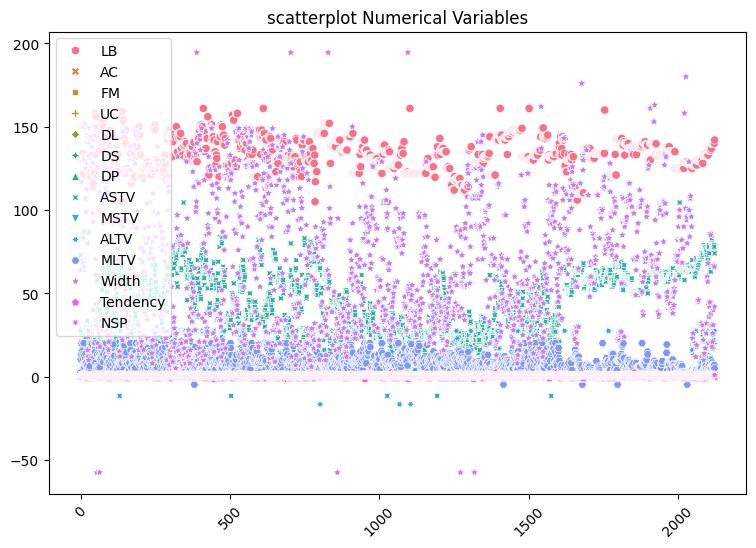

In [57]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df[['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']])
plt.title('scatterplot Numerical Variables')
plt.xticks(rotation=45)
plt.show()

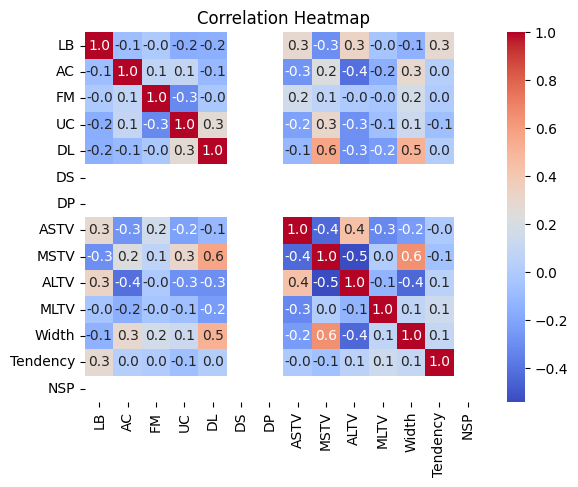

In [34]:
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

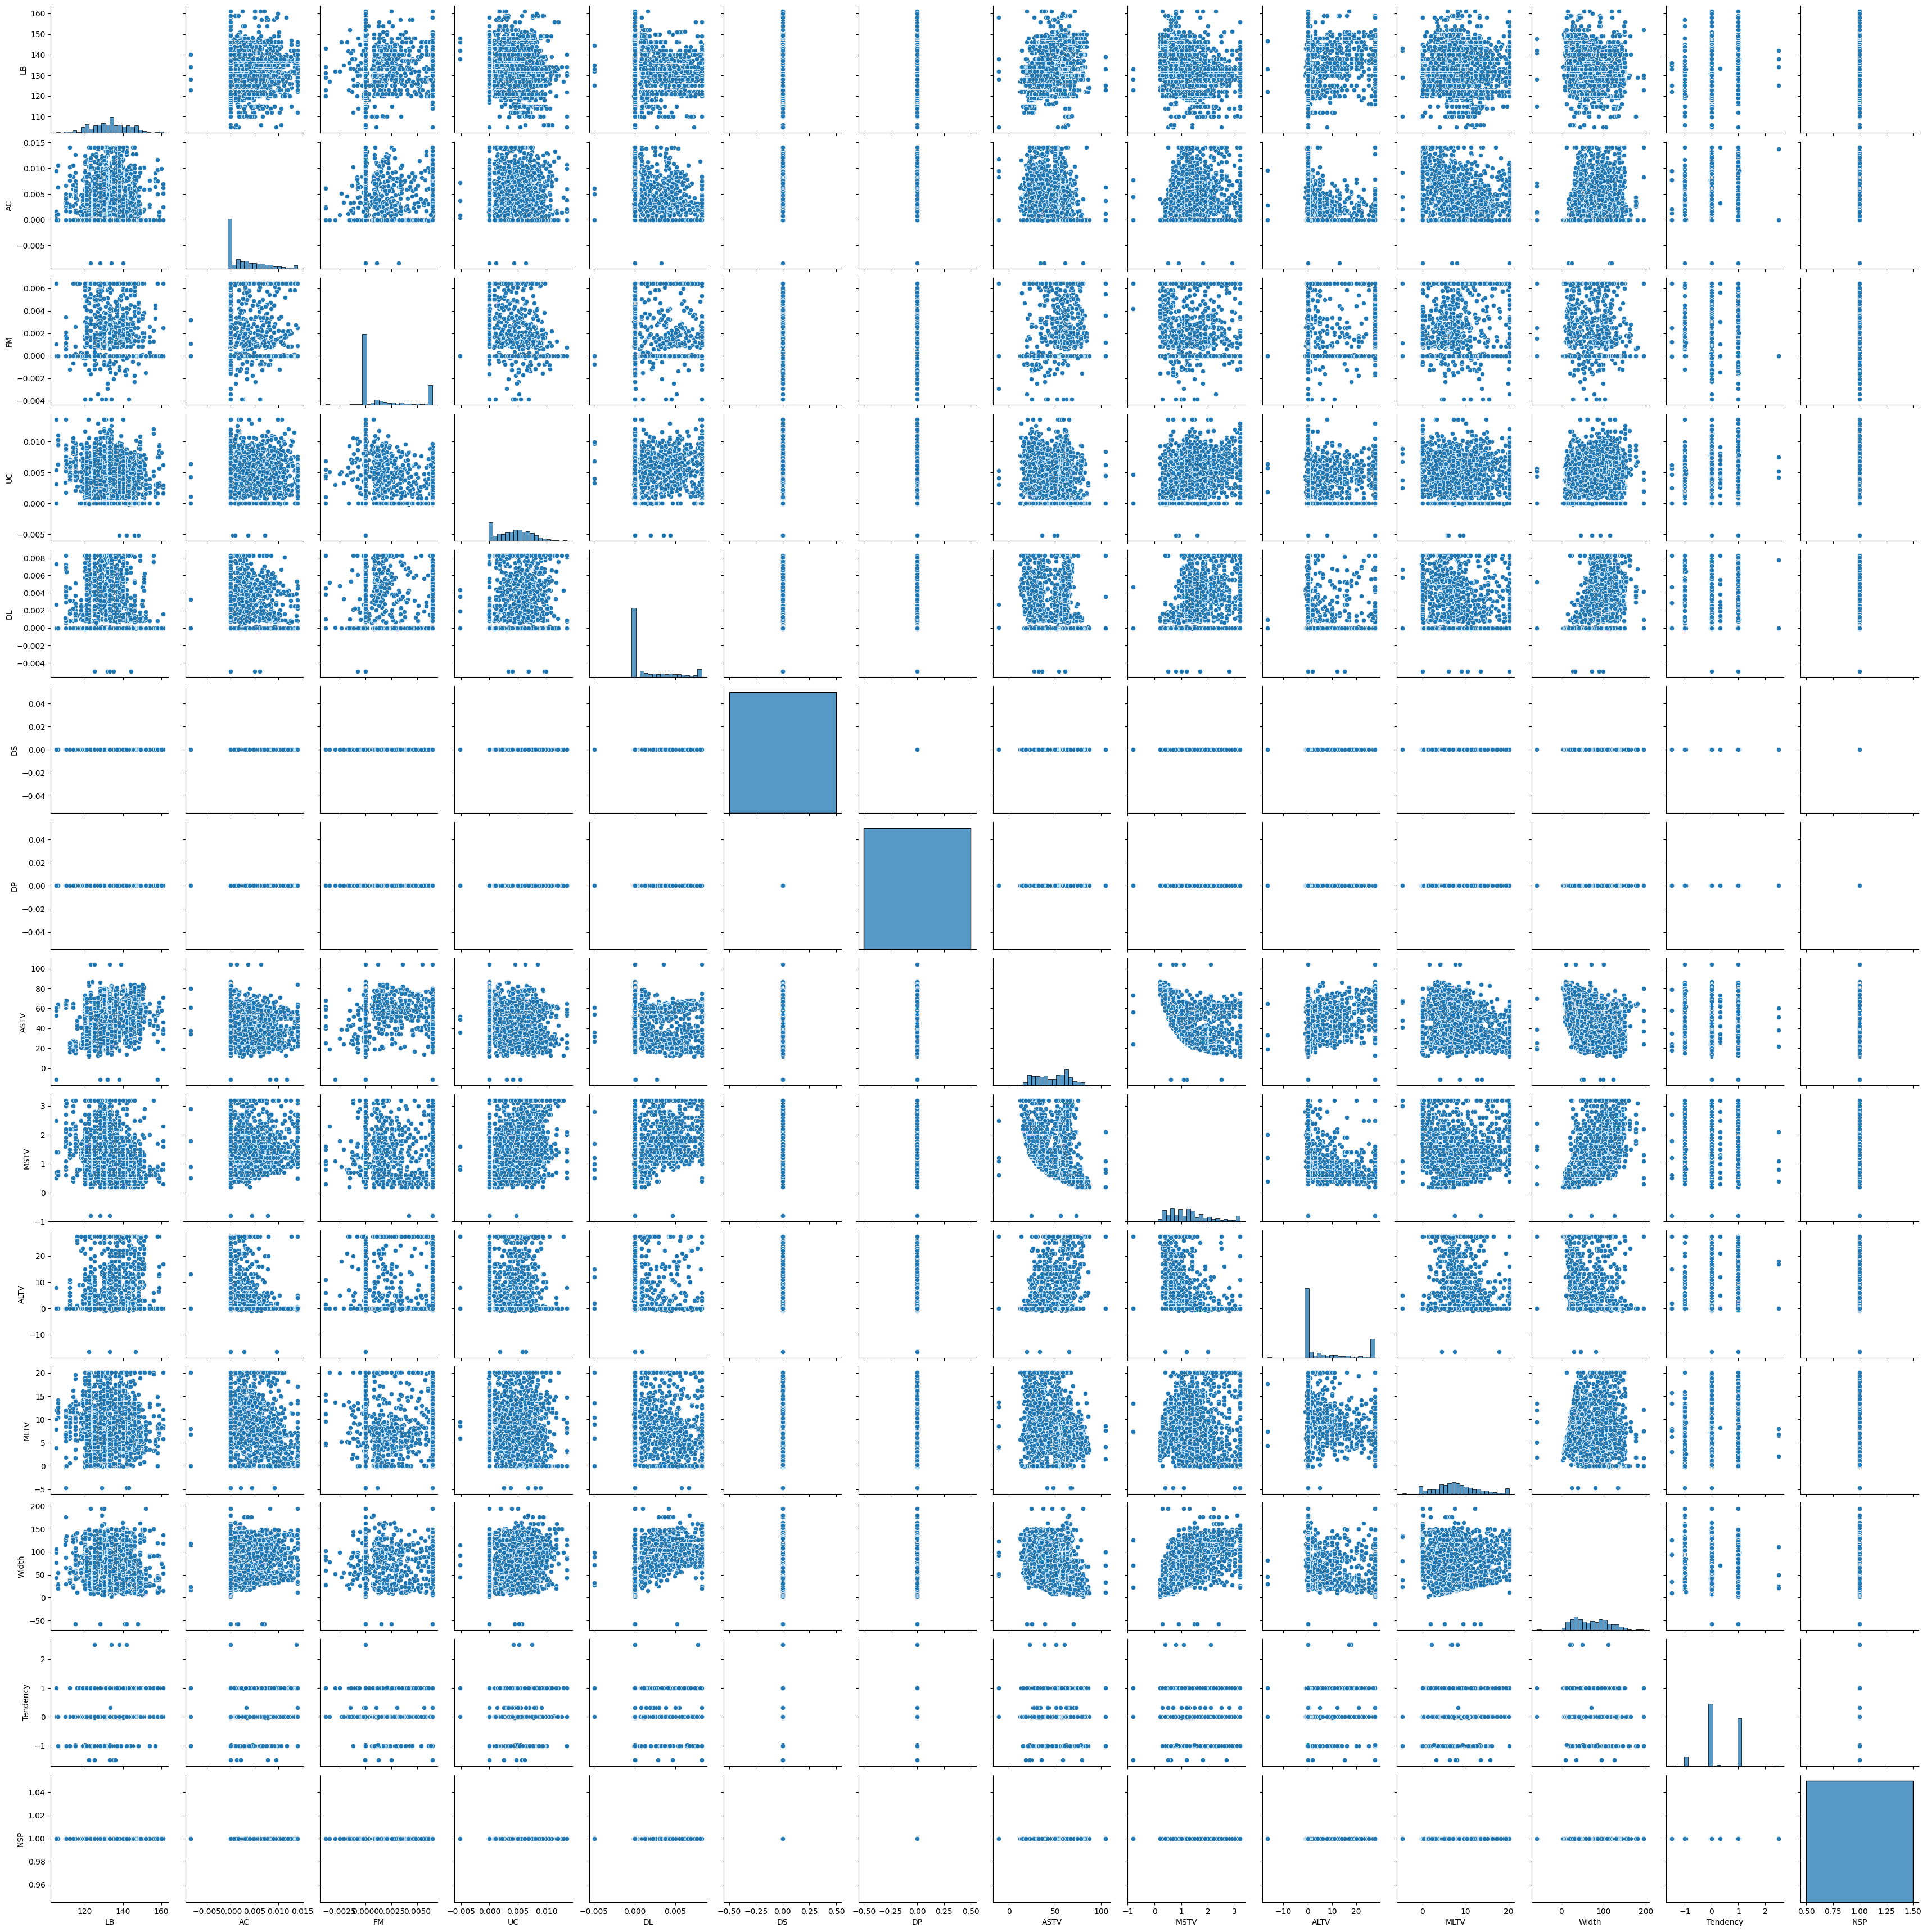

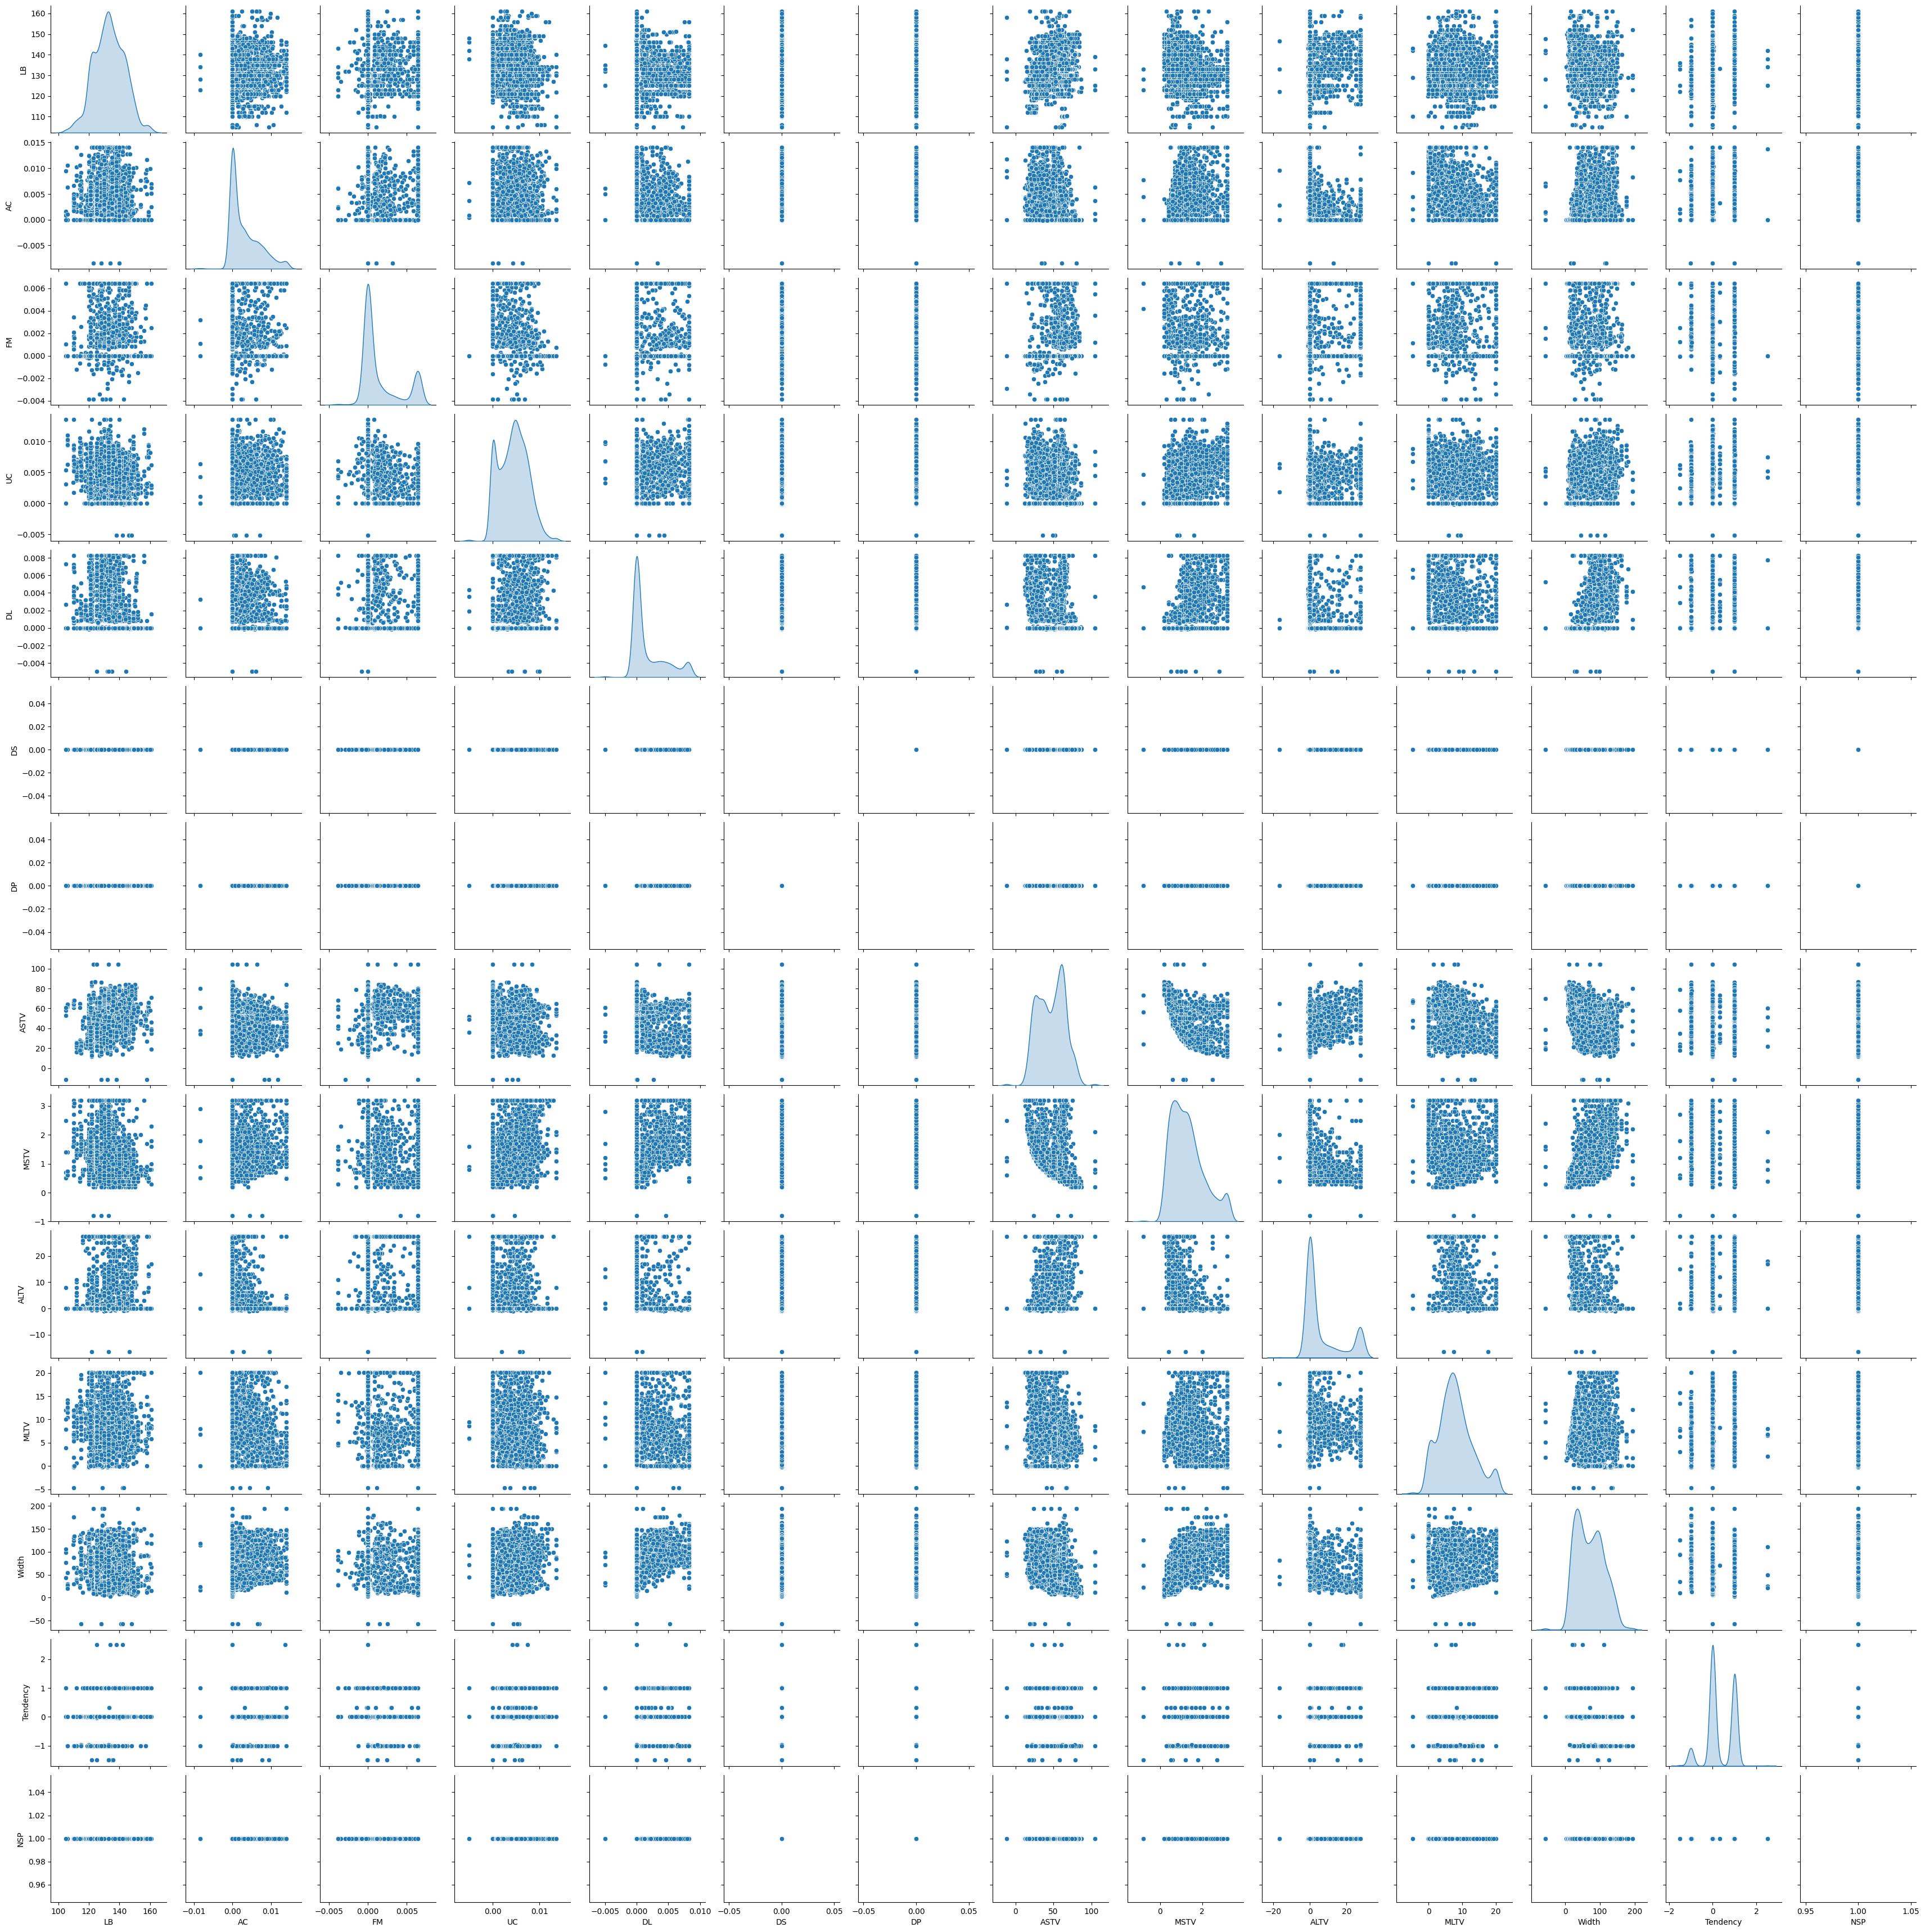

In [33]:
sns.pairplot(df)

# Pair plot with color grouping
sns.pairplot(df, diag_kind='kde')  # hue is for a categorical column
plt.show()

Pattern Recognition and Insights

In [37]:
corr_matrics=df.corr()
corr_matrics

LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000 -0.081669 -0.006815 -0.163308 -0.156278 NaN NaN  0.285463   
AC       -0.081669  1.000000  0.076091  0.093575 -0.102934 NaN NaN -0.273178   
FM       -0.006815  0.076091  1.000000 -0.318156 -0.018024 NaN NaN  0.155798   
UC       -0.163308  0.093575 -0.318156  1.000000  0.268151 NaN NaN -0.217484   
DL       -0.156278 -0.102934 -0.018024  0.268151  1.000000 NaN NaN -0.112289   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.285463 -0.273178  0.155798 -0.217484 -0.112289 NaN NaN  1.000000   
MSTV     -0.295017  0.217933  0.070412  0.298462  0.566625 NaN NaN -0.433731   
ALTV      0.322748 -0.409829 -0.013820 -0.294226 -0.296383 NaN NaN  0.438800   
MLTV     -0.042275 -0.152032 -0.036313 -0.072964 -0.242173 NaN NaN -0.323958   
Width    -0.140008  0.283771  0.164247  0.131110  0.514348 NaN NaN -0.242124   
Tendency  0.281361  0.029333  0.000673 -0.074266  0.014583 NaN NaN -0.010278   
NSP            NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   

              MSTV      ALTV      MLTV     Width  Tendency  NSP  
LB       -0.295017  0.322748 -0.042275 -0.140008  0.281361  NaN  
AC        0.217933 -0.409829 -0.152032  0.283771  0.029333  NaN  
FM        0.070412 -0.013820 -0.036313  0.164247  0.000673  NaN  
UC        0.298462 -0.294226 -0.072964  0.131110 -0.074266  NaN  
DL        0.566625 -0.296383 -0.242173  0.514348  0.014583  NaN  
DS             NaN       NaN       NaN       NaN       NaN  NaN  
DP             NaN       NaN       NaN       NaN       NaN  NaN  
ASTV     -0.433731  0.438800 -0.323958 -0.242124 -0.010278  NaN  
MSTV      1.000000 -0.541296  0.011322  0.646468 -0.063075  NaN  
ALTV     -0.541296  1.000000 -0.133185 -0.439913  0.050549  NaN  
MLTV      0.011322 -0.133185  1.000000  0.073507  0.142322  NaN  
Width     0.646468 -0.439913  0.073507  1.000000  0.100996  NaN  
Tendency -0.063075  0.050549  0.142322  0.100996  1.000000  NaN  
NSP            NaN       NaN       NaN       NaN       NaN  NaN

In [58]:
high_corr = corr_matrix[(corr_matrix >= 0.5) & (corr_matrix < 1.0)]
print("\nHigh Correlations (>= 0.5) Between Variables:")
print(high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1))


High Correlations (>= 0.5) Between Variables:
             DL      MSTV     Width
DL          NaN  0.566625  0.514348
MSTV   0.566625       NaN  0.646468
Width  0.514348  0.646468       NaN


5.Conclusion:

Findings and observations :

The baseline fetal heart rate (LB) has moderate variability, with an average of around 133 bpm.
Abnormal variability indicators (ASTV, ALTV) show high dispersion, which might indicate varied fetal well-being states.
Positive correlation observed between ASTV and ALTV, suggesting that short- and long-term variabilities tend to increase together.
Outliers observed in variables like LB, AC, and ASTV, which could represent specific cases that require further analysis or monitoring.
Further analysis could include examining temporal trends (if timestamps were available) or applying machine learning models for predictive analysis based on these indicators.